The Lotka-Volterra (predator-prey) model represents a simplified model of the change in populations of two species which interact via predation. 

Let $x$ represents the prey population and $y$ represents the predator population, respectively. Then, the system of equations read
\begin{align}
&x' = \alpha x - \beta xy\\
&y' = -\gamma y + \delta xy
\end{align}
where $\alpha,\beta, \gamma,\delta \in \mathbb R_+$ are growth and deaths parameters (we are of course restricting to the case $x,y \geq 0$ in order for these solutions to make sense physically).

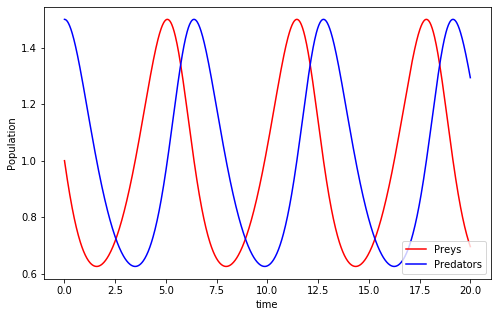

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

a,b,c,d = 1,1,1,1

def LotkaVolterra(X, t,a,b,c,d):
    x = X[0]; # preys
    y = X[1]; # predators
    dxdt =  a*x - b*x*y
    dydt = -c*y + d*x*y
    return np.array([dxdt, dydt])

tmax = 20.0; 
tmin = 0.0;
tspan = np.linspace(tmin, tmax, 1000)

X0 = [1.0, 1.5]  # initial conditions
Xsol = odeint(LotkaVolterra, X0, tspan, args = (a,b,c,d,))

plt.figure(figsize=(8,5))
plt.plot(tspan, Xsol[:,0], 'r-', label="Preys")
plt.plot(tspan, Xsol[:,1], 'b-', label="Predators")
plt.xlabel("time") 
plt.ylabel("Population") 
plt.legend(loc='lower right')
plt.show()

We can look for the equilibrium solutions: 
\begin{gather}
\left\{ x(t) = 0, \ y(t) = 0 \right\} \qquad \text{and} \qquad \left\{ x(t) = \frac{c}{d}, \ y(t) = \frac{a}{b}\right\}
\end{gather}

The orbits of the Lotka-Volterra system are the family of (closed) curves defined as
\begin{gather}
\frac{y^\alpha}{e^{\beta y}} \frac{x^\gamma}{e^{\delta x}} = K
\end{gather}
for some poisitve constant $K$ that is identified by the initial conditions.

We plot here a collection of these curves:

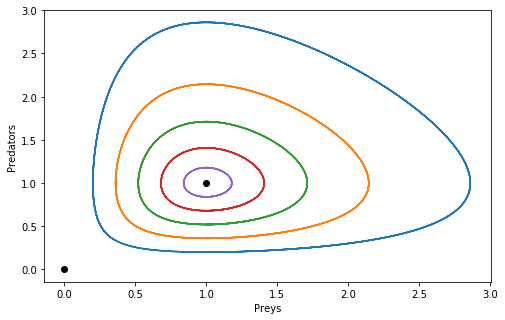

In [28]:
n_curves = 6;  # number of curves on the phase plot

prey0 = 1.0;  # Initial number of preys
pred0 = np.linspace(0.2, 1, n_curves)  # Initial number of predators

plt.figure(figsize=(8,5))

plt.plot(c/d,a/b,'ko') 
plt.plot(0.0,0.0,'ko') 
#plt.vlines(x=c/d, ymin=0.0, ymax=3.0, ls='--')

for k in range(n_curves):
    Xsol = odeint(LotkaVolterra, [prey0, pred0[k]], tspan, args=(a,b,c,d, ))
    plt.plot(Xsol[:,0], Xsol[:,1])
    
plt.xlabel("Preys") 
plt.ylabel("Predators")
plt.show()

If we vary one of the parameters, say $\beta$ (i.e. the appetite of the predators), we can inspect how the orbits in the phase spaces vary. Note that by changing $\beta$, the position of the stable equilibrium changes as well.

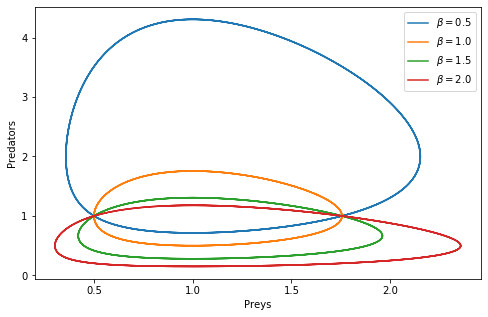

In [39]:
betas = np.linspace(0.5, 2.0, 4)
X0 = [0.5, 1.0]

plt.figure(figsize=(8,5))

for bval in betas:
    Xsol = odeint(LotkaVolterra, X0, tspan, args=(a,bval,c,d,))
    plt.plot(Xsol[:,0], Xsol[:,1], label=r'$\beta = $'+str(bval));

plt.xlabel("Preys") 
plt.ylabel("Predators")
plt.legend()
plt.show()

We can now perturbe the model by introducing an external factor (e.g. hunting by humans) within the environment: 
\begin{align}
&x' = \alpha x - \beta xy -\epsilon x\\
&y' = -\gamma y + \delta xy - \epsilon y
\end{align}
with $\epsilon \ll 1$.

The (stable) equilibrium point will simply be a translation of the unperturbed ($\epsilon =0$) equilibrium point: 
\begin{gather}
\left\{ x(t) = \frac{c+\epsilon}{d}, \ y(t) = \frac{a-\epsilon}{b}\right\}
\end{gather}

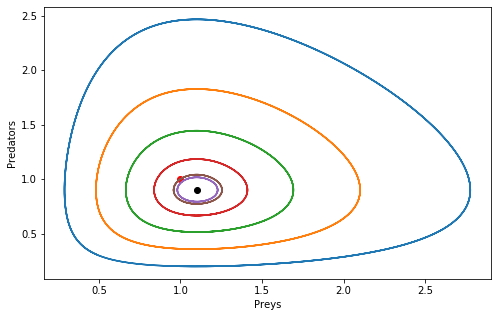

In [42]:
eps = 0.1

a,b,c,d = 1,1,1,1

def LotkaVolterra_eps(X, t,a,b,c,d,eps):
    x = X[0]; # preys
    y = X[1]; # predators
    dxdt =  a*x - b*x*y-eps*x
    dydt = -c*y + d*x*y-eps*y
    return np.array([dxdt, dydt])

n_curves = 6
prey0 = 1.0; 
pred0 = np.linspace(0.2, 1, n_curves) 

plt.figure(figsize=(8,5))

plt.plot(c/d,a/b,'ro')  # equilibrium point of the unperturbed system
plt.plot((c+eps)/d,(a-eps)/b,'ko') # equilibrium point of the perturbed system

for k in range(n_curves):
    Xsol = odeint(LotkaVolterra_eps, [prey0, pred0[k]], tspan, args=(a,b,c,d,eps, ))
    plt.plot(Xsol[:,0], Xsol[:,1])
    
plt.xlabel("Preys") 
plt.ylabel("Predators")
plt.show()

A more general model of predator-prey interactions is the system of differential equations
\begin{align}
&x' = \alpha x - \beta xy -\eta x^2\\
&y' = -\gamma y + \delta xy - \zeta y^2
\end{align}
with $\eta,\zeta \in \mathbb R_+$.

Here, the term $\eta x^2$ reflects the internal competition of the prey $x$ for their limited external resources, and the term $\zeta y^2$ reflects the competition among the predators for the limited number of prey. Note that the solutions are not, in general, periodic.

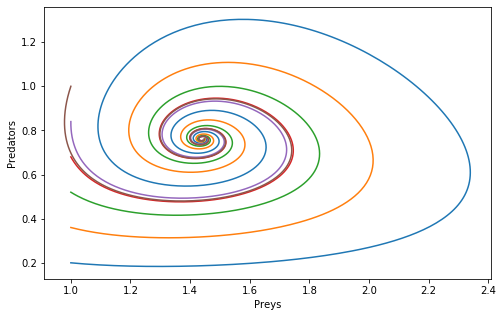

In [54]:
a,b,c,d,e,f = .6,.6,1,.8,.1,.2

def LotkaVolterra_resources(X, t,a,b,c,d,e,f):
    x = X[0]; # preys
    y = X[1]; # predators
    dxdt =  a*x - b*x*y-e*x**2
    dydt = -c*y + d*x*y-f*y**2
    return np.array([dxdt, dydt])


tmax = 30.0; 
tmin = 0.0;
tspan = np.linspace(tmin, tmax, 1000)


n_curves = 6
prey0 = 1.0; 
pred0 = np.linspace(0.2, 1, n_curves) 

plt.figure(figsize=(8,5))

#plt.plot(c/d,a/b,'ro')  # equilibrium point of the unperturbed system

for k in range(n_curves):
    Xsol = odeint(LotkaVolterra_resources, [prey0, pred0[k]], tspan, args=(a,b,c,d,e,f, ))
    plt.plot(Xsol[:,0], Xsol[:,1])
    
plt.xlabel("Preys") 
plt.ylabel("Predators")
plt.show()